In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sn 
import os 
import geopandas
import matplotlib.pyplot as plt
from math import radians, sin, cos, sqrt, atan2
from shapely.geometry import Point
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [2]:
datafiles = ["USDA-AMS-Data-and-Metrics\\Food Access\\food_access1.csv",
            "USDA-AMS-Data-and-Metrics\\Food Access\\food_access2.csv",
            "USDA-AMS-Data-and-Metrics\\Business Development and Infrastructure\\business_development_infrastructure.csv",
            "USDA-AMS-Data-and-Metrics\\Grants\\grants.csv",
            "USDA-AMS-Data-and-Metrics\\Indicators of Community Wealth\\community_wealth.csv",
            "USDA-AMS-Data-and-Metrics\\Local Food Sales\\local_food_sales.csv"]

In [3]:
variables = ["pct_laccess_pop", 
             "food_banks", 
             "food_desert_1and10", 
             "rwj_food_environment_index",
             "retail_density_index", 
             "food_insecurity_rate", 
             "below_poverty_level_percent_civilian_labor_force_16_years_and_over",
             "ffrpth",
             "convspth",
             "specspth",
             "health_factors",
             "health_outcomes",
             "public_refrigerated_warehouses",
             "d2c_intermediated_p",
             "fmrktpth"]

In [4]:
full_df = pd.read_csv(datafiles[0]).dropna(subset=['county_name'])
full_df['fips'] = full_df['fips'].astype(str).str.zfill(5)
full_df = full_df.pivot(index=['fips', 'year'], columns='variable_name', values='value')
columns = [x for x in full_df.columns if x in variables]
full_df = full_df[columns]

for file in datafiles[1:]:
    #read in datasheet and drop anything that is not a county
    data = pd.read_csv(file).dropna(subset=['county_name'])
    #fix dropping of leading zero
    data['fips'] = data['fips'].astype(str).str.zfill(5)
    #create pivoted df
    pivoted_df = data.pivot(index=['fips', 'year'], columns='variable_name', values='value')
    #merge only needed vars with the full dataframe
    columns = [x for x in pivoted_df.columns if x in variables]
    full_df = full_df.combine_first(pivoted_df[columns])
full_df

C:\Users\hthog\AppData\Local\Temp\ipykernel_37592\2474579696.py:16: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  full_df = full_df.combine_first(pivoted_df[columns])
C:\Users\hthog\AppData\Local\Temp\ipykernel_37592\2474579696.py:16: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  full_df = full_df.combine_first(pivoted_df[columns])
C:\Users\hthog\AppData\Local\Temp\ipykernel_37592\2474579696.py:16: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  full_df = full_df.combine_first(pivoted_df[columns])
C:\Users\hthog\AppData\Local\Temp\ipykernel_37592\2474579696.py:16: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  full_df = full_df.combine_first(pivoted_df[columns])


variable_name  below_poverty_level_percent_civilian_labor_force_16_years_and_over  \
fips  year                                                                          
01001 2015                                                   NaN                    
      2016                                                   NaN                    
      2017                                                   NaN                    
      2018                                                   NaN                    
      2019                                                   NaN                    
...                                                          ...                    
72153 2022                                                   NaN                    
74300 2022                                                   NaN                    
78010 2022                                                   NaN                    
78020 2022                                                   NaN                    
78030 2022                                                   NaN                    

variable_name  convspth  d2c_intermediated_p    ffrpth  fmrktpth  food_banks  \
fips  year                                                                     
01001 2015          NaN                  NaN       NaN       NaN         NaN   
      2016     0.560802                  NaN  0.795977       NaN         NaN   
      2017          NaN                  0.0       NaN       NaN         NaN   
      2018          NaN                  NaN       NaN  0.017985         0.0   
      2019          NaN                  NaN       NaN       NaN         NaN   
...                 ...                  ...       ...       ...         ...   
72153 2022          NaN                  NaN       NaN       NaN         NaN   
74300 2022          NaN                  NaN       NaN       NaN         NaN   
78010 2022          NaN                  NaN       NaN       NaN         NaN   
78020 2022          NaN                  NaN       NaN       NaN         NaN   
78030 2022          NaN                  NaN       NaN       NaN         NaN   

variable_name  food_desert_1and10  food_insecurity_rate  health_factors  \
fips  year                                                                
01001 2015                    NaN                   NaN             NaN   
      2016                    NaN                   NaN             NaN   
      2017                    NaN                   NaN             NaN   
      2018                    NaN                   NaN             NaN   
      2019                    5.0                 0.157             NaN   
...                           ...                   ...             ...   
72153 2022                    NaN                   NaN             NaN   
74300 2022                    NaN                   NaN             NaN   
78010 2022                    NaN                   NaN             NaN   
78020 2022                    NaN                   NaN             NaN   
78030 2022                    NaN                   NaN             NaN   

variable_name  health_outcomes  pct_laccess_pop  retail_density_index  \
fips  year                                                              
01001 2015                 NaN         0.320623                   NaN   
      2016                 NaN              NaN              0.128134   
      2017                 NaN              NaN                   NaN   
      2018                 NaN              NaN                   NaN   
      2019                 NaN              NaN                   NaN   
...                        ...              ...                   ...   
72153 2022                 NaN              NaN                   NaN   
74300 2022                 NaN              NaN                   NaN   
78010 2022                 NaN              NaN                   NaN   
78020 2022                 NaN              NaN                   NaN   
7

In [5]:
states =   ['01',
            '04',
            '05',
            '06',
            '08',
            '09',
            '10',
            '12',
            '13',
            '16',
            '17',
            '18',
            '19',
            '20',
            '21',
            '23',
            '24',
            '25',
            '26',
            '27',
            '28',
            '29',
            '30',
            '31',
            '32',
            '33',
            '34',
            '35',
            '36',
            '37',
            '38',
            '39',
            '40',
            '41',
            '42',
            '44',
            '45',
            '46',
            '47',
            '48',
            '49',
            '50',
            '51',
            '53',
            '54',
            '55',
            '56',
            '22',
            '11']

In [6]:
full_df['fips_prefix'] = full_df.index.get_level_values('fips').str[:2]
df_filtered = full_df[full_df['fips_prefix'].isin(states)]

In [7]:
df_filtered = df_filtered.groupby(level='fips').ffill()
df_filtered = df_filtered.loc[df_filtered.index.get_level_values('year') == 2022]
df_filtered

,variable_name,below_poverty_level_percent_civilian_labor_force_16_years_and_over,convspth,d2c_intermediated_p,ffrpth,fmrktpth,food_banks,food_desert_1and10,food_insecurity_rate,health_factors,health_outcomes,pct_laccess_pop,retail_density_index,rwj_food_environment_index,specspth,fips_prefix
fips,year,,,,,,,,,,,,,,,
01001,2022,0.072,0.560802,0.000000,0.795977,0.017985,0.0,5.0,0.157,0.503973,0.602250,0.320623,0.128134,7.2,0.018090,01
01003,2022,0.053,0.568650,0.003563,0.751775,0.018347,0.0,4.0,0.134,0.803070,1.352926,0.167675,0.171615,8.0,0.130115,01
01005,2022,0.134,0.737177,0.004016,0.892372,0.160765,0.0,4.0,0.207,-0.388564,0.029855,0.221056,0.198475,5.6,0.077598,01
01007,2022,0.064,0.662749,0.000000,0.309283,0.044643,0.0,0.0,0.163,-0.291682,-0.638328,0.042303,0.182554,7.8,0.000000,01
01009,2022,0.052,0.469059,0.007853,0.399569,0.017289,0.0,0.0,0.145,0.399893,0.831054,0.064974,0.112796,8.4,0.000000,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,2022,0.079,0.497231,0.000000,0.700644,0.046457,0.0,0.0,0.113,-0.467665,-0.438318,0.432241,0.124511,7.7,0.022601,56
56039,2022,0.066,0.819672,0.007042,0.862813,0.129977,0.0,0.0,0.090,0.744734,1.784474,0.291744,0.322541,8.2,0.345125,56
56041,2022,0.063,0.627686,0.009926,0.820820,0.098527,0.0,0.0,0.126,0.129789,-0.609521,0.221897,0.170996,7.4,0.096567,56


In [8]:
data = pd.read_csv("USDA-AMS-Data-and-Metrics\\Point level data\\point_data.csv")
data['fips'] = data['fips'].astype(str).str.zfill(5)
data

,fips,state_name,county_name,lat,long,org_type,variable_name
0,06057,California,Nevada County,39.320260,-120.150670,Food Hub,location_food_hub
1,35045,New Mexico,San Juan County,36.773792,-108.167380,Food Hub,location_food_hub
2,37099,North Carolina,Jackson County,35.322406,-83.157802,Food Hub,location_food_hub
3,19191,Iowa,Winneshiek County,43.298101,-91.787872,Food Hub,location_food_hub
4,06075,California,San Francisco County,37.750507,-122.389110,Food Hub,location_food_hub
...,...,...,...,...,...,...,...
12989,32003,Nevada,Clark County,36.142355,-115.206409,Colleges and universities,location_colleges_universities
12990,32003,Nevada,Clark County,36.117236,-115.158173,Colleges and universities,location_colleges_universities
12991,34007,New Jersey,Camden County,39.939428,-75.015417,Colleges and universities,location_colleges_universities
12992,06029,California,Kern County,35.339951,-119.035082,Colleges and universities,location_colleges_universities


In [9]:
filename = "countiesWithStatesAndPopulation.shp"
map_data = geopandas.read_file(filename = filename)
map_data["FIPS"] = map_data["STATEFP"].astype(str) + map_data["COUNTYFP"].astype(str)
map_data['FIPS'] = map_data['FIPS'].astype(str).str.zfill(5)
map_data = map_data.set_index("FIPS")
map_data

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,State,geometry
FIPS,,,,,,,,,,,
21007,21,007,00516850,0500000US21007,Ballard,06,639387454,69473325,7888.0,Kentucky,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
21017,21,017,00516855,0500000US21017,Bourbon,06,750439351,4829777,19788.0,Kentucky,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
21031,21,031,00516862,0500000US21031,Butler,06,1103571974,13943044,12879.0,Kentucky,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
21065,21,065,00516879,0500000US21065,Estill,06,655509930,6516335,14106.0,Kentucky,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
21069,21,069,00516881,0500000US21069,Fleming,06,902727151,7182793,14581.0,Kentucky,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."
...,...,...,...,...,...,...,...,...,...,...,...
31073,31,073,00835858,0500000US31073,Gosper,06,1186616237,11831826,1990.0,Nebraska,"POLYGON ((-100.09510 40.43866, -100.08937 40.4..."
39075,39,075,01074050,0500000US39075,Holmes,06,1094405866,3695230,43960.0,Ohio,"POLYGON ((-82.22066 40.66758, -82.19327 40.667..."
48171,48,171,01383871,0500000US48171,Gillespie,06,2740719114,9012764,26988.0,Texas,"POLYGON ((-99.30400 30.49983, -99.28234 30.499..."


In [10]:
map_data = map_data[["NAME", "State", "geometry", "Population"]]
map_data = map_data.sort_index()
map_data

,NAME,State,geometry,Population
FIPS,,,,
01001,Autauga,Alabama,"POLYGON ((-86.92120 32.65754, -86.92035 32.658...",55869.0
01003,Baldwin,Alabama,"POLYGON ((-88.02858 30.22676, -88.02399 30.230...",223234.0
01005,Barbour,Alabama,"POLYGON ((-85.74803 31.61918, -85.74544 31.618...",24686.0
01007,Bibb,Alabama,"POLYGON ((-87.42194 33.00338, -87.31854 33.006...",22394.0
01009,Blount,Alabama,"POLYGON ((-86.96336 33.85822, -86.95967 33.857...",57826.0
...,...,...,...,...
56037,Sweetwater,Wyoming,"POLYGON ((-110.05438 42.01103, -110.05436 42.0...",42343.0
56039,Teton,Wyoming,"POLYGON ((-111.05361 44.66627, -110.75076 44.6...",23464.0
56041,Uinta,Wyoming,"POLYGON ((-111.04662 41.15604, -111.04659 41.2...",20226.0


In [11]:
# map_data["Centroid"] = map_data["geometry"].centroid
# map_data["Rep Point"] = map_data["geometry"].representative_point()
filename = "Centers of Population.csv"
centers = pd.read_csv(filename)
centers["FIPS"] = centers["STATEFP"].astype(str).str.zfill(2) + centers["COUNTYFP"].astype(str).str.zfill(3)
centers = centers.set_index("FIPS")
map_data[["LATITUDE","LONGITUDE"]] = centers[["LATITUDE","LONGITUDE"]]
map_data["center"] = map_data.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)
map_data.dropna(inplace = True)
map_data

C:\Users\hthog\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,NAME,State,geometry,Population,LATITUDE,LONGITUDE,center
FIPS,,,,,,,
01001,Autauga,Alabama,"POLYGON ((-86.92120 32.65754, -86.92035 32.658...",55869.0,32.500194,-86.487813,POINT (-86.48781 32.50019)
01003,Baldwin,Alabama,"POLYGON ((-88.02858 30.22676, -88.02399 30.230...",223234.0,30.537396,-87.761478,POINT (-87.76148 30.53740)
01005,Barbour,Alabama,"POLYGON ((-85.74803 31.61918, -85.74544 31.618...",24686.0,31.843981,-85.301306,POINT (-85.30131 31.84398)
01007,Bibb,Alabama,"POLYGON ((-87.42194 33.00338, -87.31854 33.006...",22394.0,33.032236,-87.136826,POINT (-87.13683 33.03224)
01009,Blount,Alabama,"POLYGON ((-86.96336 33.85822, -86.95967 33.857...",57826.0,33.954604,-86.592667,POINT (-86.59267 33.95460)
...,...,...,...,...,...,...,...
56037,Sweetwater,Wyoming,"POLYGON ((-110.05438 42.01103, -110.05436 42.0...",42343.0,41.580564,-109.302521,POINT (-109.30252 41.58056)
56039,Teton,Wyoming,"POLYGON ((-111.05361 44.66627, -110.75076 44.6...",23464.0,43.491744,-110.785815,POINT (-110.78581 43.49174)
56041,Uinta,Wyoming,"POLYGON ((-111.04662 41.15604, -111.04659 41.2...",20226.0,41.271502,-110.760395,POINT (-110.76040 41.27150)


In [12]:
df_filtered.reset_index(level='year', inplace=True)
df_filtered[["geometry","center", "NAME", 'State']] = map_data[["geometry", "center", "NAME", "State"]]

In [13]:
df_filtered = df_filtered.dropna(subset=["geometry", "center"])
df_filtered

variable_name,year,below_poverty_level_percent_civilian_labor_force_16_years_and_over,convspth,d2c_intermediated_p,ffrpth,fmrktpth,food_banks,food_desert_1and10,food_insecurity_rate,health_factors,health_outcomes,pct_laccess_pop,retail_density_index,rwj_food_environment_index,specspth,fips_prefix,geometry,center,NAME,State
fips,,,,,,,,,,,,,,,,,,,,
01001,2022,0.072,0.560802,0.000000,0.795977,0.017985,0.0,5.0,0.157,0.503973,0.602250,0.320623,0.128134,7.2,0.018090,01,"POLYGON ((-86.92120 32.65754, -86.92035 32.658...",POINT (-86.48781 32.50019),Autauga,Alabama
01003,2022,0.053,0.568650,0.003563,0.751775,0.018347,0.0,4.0,0.134,0.803070,1.352926,0.167675,0.171615,8.0,0.130115,01,"POLYGON ((-88.02858 30.22676, -88.02399 30.230...",POINT (-87.76148 30.53740),Baldwin,Alabama
01005,2022,0.134,0.737177,0.004016,0.892372,0.160765,0.0,4.0,0.207,-0.388564,0.029855,0.221056,0.198475,5.6,0.077598,01,"POLYGON ((-85.74803 31.61918, -85.74544 31.618...",POINT (-85.30131 31.84398),Barbour,Alabama
01007,2022,0.064,0.662749,0.000000,0.309283,0.044643,0.0,0.0,0.163,-0.291682,-0.638328,0.042303,0.182554,7.8,0.000000,01,"POLYGON ((-87.42194 33.00338, -87.31854 33.006...",POINT (-87.13683 33.03224),Bibb,Alabama
01009,2022,0.052,0.469059,0.007853,0.399569,0.017289,0.0,0.0,0.145,0.399893,0.831054,0.064974,0.112796,8.4,0.000000,01,"POLYGON ((-86.96336 33.85822, -86.95967 33.857...",POINT (-86.59267 33.95460),Blount,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,2022,0.079,0.497231,0.000000,0.700644,0.046457,0.0,0.0,0.113,-0.467665,-0.438318,0.432241,0.124511,7.7,0.022601,56,"POLYGON ((-110.05438 42.01103, -110.05436 42.0...",POINT (-109.30252 41.58056),Sweetwater,Wyoming
56039,2022,0.066,0.819672,0.007042,0.862813,0.129977,0.0,0.0,0.090,0.744734,1.784474,0.291744,0.322541,8.2,0.345125,56,"POLYGON ((-111.05361 44.66627, -110.75076 44.6...",POINT (-110.78581 43.49174),Teton,Wyoming
56041,2022,0.063,0.627686,0.009926,0.820820,0.098527,0.0,0.0,0.126,0.129789,-0.609521,0.221897,0.170996,7.4,0.096567,56,"POLYGON ((-111.04662 41.15604, -111.04659 41.2...",POINT (-110.76040 41.27150),Uinta,Wyoming


In [14]:
def calculate_distance(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    # Radius of the Earth in kilometers
    earth_radius = 6371

    # Calculate the differences between the latitudes and longitudes
    delta_lat = lat2_rad - lat1_rad
    delta_lon = lon2_rad - lon1_rad

    # Apply the Haversine formula
    a = np.sin(delta_lat / 2) ** 2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(delta_lon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = earth_radius * c

    return distance

In [15]:
# Initialize the counts as zero
df_filtered["Population"] = map_data["Population"]

df_filtered["csa_region"] = 0
df_filtered["fm_region"] = 0
df_filtered["fh_region"] = 0
df_filtered["mp_region"] = 0

# Filter the data DataFrame by org_type once
csas = data[data["org_type"] == "Community Supported Agriculture (CSA)"]
farmers_markets = data[data["org_type"] == "Farmers Market"]
food_hubs = data[data["org_type"] == "Food Hub"]
meat_processors = data[data["org_type"] == "Meat processor"]

for i, row in df_filtered.iterrows():
    point1x = row["center"].x
    point1y = row["center"].y

    # Calculate distances for each org_type and count within the given distance threshold
    csa_count = ((calculate_distance(point1y, point1x, csas["lat"], csas["long"]) <= 563.2704).sum())
    fm_count = ((calculate_distance(point1y, point1x, farmers_markets["lat"], farmers_markets["long"]) <= 563.2704).sum())
    fh_count = ((calculate_distance(point1y, point1x, food_hubs["lat"], food_hubs["long"]) <= 563.2704).sum())
    mp_count = ((calculate_distance(point1y, point1x, meat_processors["lat"], meat_processors["long"]) <= 563.2704).sum())

    # Assign the counts to the respective columns
    df_filtered.at[i, "csa_region"] = csa_count
    df_filtered.at[i, "fm_region"] = fm_count
    df_filtered.at[i, "fh_region"] = fh_count
    df_filtered.at[i, "mp_region"] = mp_count

C:\Users\hthog\AppData\Local\Temp\ipykernel_37592\1449600568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Population"] = map_data["Population"]
C:\Users\hthog\AppData\Local\Temp\ipykernel_37592\1449600568.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["csa_region"] = 0
C:\Users\hthog\AppData\Local\Temp\ipykernel_37592\1449600568.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [16]:
income_data = pd.read_excel("Unemployment.xlsx")
income_data["FIPS"] = income_data["FIPS_Code"].astype(str).str.zfill(5)
income_data = income_data.set_index("FIPS")
income_data

,FIPS_Code,State,Area_Name,Rural_Urban_Continuum_Code_2013,Urban_Influence_Code_2013,Metro_2013,Unemployment_rate_2022,Median_Household_Income_2021,Med_HH_Income_Percent_of_State_Total_2021
FIPS,,,,,,,,,
00000,0,US,United States,NaN,NaN,NaN,3.7,69717.0,NaN
01000,1000,AL,Alabama,NaN,NaN,NaN,2.6,53990.0,100.0
01001,1001,AL,"Autauga County, AL",2.0,2.0,1.0,2.3,66444.0,123.1
01003,1003,AL,"Baldwin County, AL",3.0,2.0,1.0,2.4,65658.0,121.6
01005,1005,AL,"Barbour County, AL",6.0,6.0,0.0,4.1,38649.0,71.6
...,...,...,...,...,...,...,...,...,...
72145,72145,PR,"Vega Baja Municipio, PR",1.0,1.0,1.0,7.4,NaN,NaN
72147,72147,PR,"Vieques Municipio, PR",7.0,12.0,0.0,6.9,NaN,NaN
72149,72149,PR,"Villalba Municipio, PR",2.0,2.0,1.0,10.4,NaN,NaN


In [17]:
df_filtered[["Income", "Unemployment"]] = income_data[["Median_Household_Income_2021", "Unemployment_rate_2022"]]
df_filtered

C:\Users\hthog\AppData\Local\Temp\ipykernel_37592\275466645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[["Income", "Unemployment"]] = income_data[["Median_Household_Income_2021", "Unemployment_rate_2022"]]
C:\Users\hthog\AppData\Local\Temp\ipykernel_37592\275466645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[["Income", "Unemployment"]] = income_data[["Median_Household_Income_2021", "Unemployment_rate_2022"]]


variable_name,year,below_poverty_level_percent_civilian_labor_force_16_years_and_over,convspth,d2c_intermediated_p,ffrpth,fmrktpth,food_banks,food_desert_1and10,food_insecurity_rate,health_factors,...,center,NAME,State,Population,csa_region,fm_region,fh_region,mp_region,Income,Unemployment
fips,,,,,,,,,,,,,,,,,,,,,
01001,2022,0.072,0.560802,0.000000,0.795977,0.017985,0.0,5.0,0.157,0.503973,...,POINT (-86.48781 32.50019),Autauga,Alabama,55869.0,2,52,1,612,66444.0,2.3
01003,2022,0.053,0.568650,0.003563,0.751775,0.018347,0.0,4.0,0.134,0.803070,...,POINT (-87.76148 30.53740),Baldwin,Alabama,223234.0,1,31,0,419,65658.0,2.4
01005,2022,0.134,0.737177,0.004016,0.892372,0.160765,0.0,4.0,0.207,-0.388564,...,POINT (-85.30131 31.84398),Barbour,Alabama,24686.0,3,51,1,635,38649.0,4.1
01007,2022,0.064,0.662749,0.000000,0.309283,0.044643,0.0,0.0,0.163,-0.291682,...,POINT (-87.13683 33.03224),Bibb,Alabama,22394.0,2,57,1,630,48454.0,2.5
01009,2022,0.052,0.469059,0.007853,0.399569,0.017289,0.0,0.0,0.145,0.399893,...,POINT (-86.59267 33.95460),Blount,Alabama,57826.0,5,73,2,697,56894.0,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,2022,0.079,0.497231,0.000000,0.700644,0.046457,0.0,0.0,0.113,-0.467665,...,POINT (-109.30252 41.58056),Sweetwater,Wyoming,42343.0,4,21,4,231,74677.0,4.2
56039,2022,0.066,0.819672,0.007042,0.862813,0.129977,0.0,0.0,0.090,0.744734,...,POINT (-110.78581 43.49174),Teton,Wyoming,23464.0,5,12,2,143,102709.0,2.7
56041,2022,0.063,0.627686,0.009926,0.820820,0.098527,0.0,0.0,0.126,0.129789,...,POINT (-110.76040 41.27150),Uinta,Wyoming,20226.0,5,17,4,223,70162.0,3.8


In [18]:
# def calculate_difference(row):
#     maximum = row.max()
#     minimum = row.min()
#     return 1 - (maximum - minimum)

# df_filtered['SNAP Inequality'] = df_filtered[["SNAP_percent_white_alone",
#                                            "SNAP_percent_black_alone",
#                                            "SNAP_percent_indian_alone",
#                                            "SNAP_percent_asian_alone",
#                                            "SNAP_percent_native_hawaiian_alone",
#                                            "SNAP_percent_other_race_alone",
#                                            "SNAP_percent_two_or_more_races",
#                                            "SNAP_percent_hispanic_any_race",
#                                            "SNAP_percent_white_alone_not_hispanic",
#                                            ]].apply(calculate_difference, axis=1)
# df_filtered['LAccess Inequality'] = df_filtered[["pct_laccess_white", 
#                                                "pct_laccess_black", 
#                                                "pct_laccess_hisp", 
#                                                "pct_laccess_nhasian", 
#                                                "pct_laccess_nhna", 
#                                                "pct_laccess_nhpi", 
#                                                "pct_laccess_multir"
#                                                 ]].apply(calculate_difference, axis=1)

# df_filtered

In [19]:
gini_df = pd.read_csv("GINI.csv")
gini_df["FIPS"] = gini_df["FIPS"].astype(str).str.zfill(5)
gini_df = gini_df.set_index("FIPS")
df_filtered["Gini"] = 1 - gini_df["Gini Index"]
df_filtered

C:\Users\hthog\AppData\Local\Temp\ipykernel_37592\2083374318.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Gini"] = 1 - gini_df["Gini Index"]


variable_name,year,below_poverty_level_percent_civilian_labor_force_16_years_and_over,convspth,d2c_intermediated_p,ffrpth,fmrktpth,food_banks,food_desert_1and10,food_insecurity_rate,health_factors,...,NAME,State,Population,csa_region,fm_region,fh_region,mp_region,Income,Unemployment,Gini
fips,,,,,,,,,,,,,,,,,,,,,
01001,2022,0.072,0.560802,0.000000,0.795977,0.017985,0.0,5.0,0.157,0.503973,...,Autauga,Alabama,55869.0,2,52,1,612,66444.0,2.3,0.5501
01003,2022,0.053,0.568650,0.003563,0.751775,0.018347,0.0,4.0,0.134,0.803070,...,Baldwin,Alabama,223234.0,1,31,0,419,65658.0,2.4,0.5428
01005,2022,0.134,0.737177,0.004016,0.892372,0.160765,0.0,4.0,0.207,-0.388564,...,Barbour,Alabama,24686.0,3,51,1,635,38649.0,4.1,0.4954
01007,2022,0.064,0.662749,0.000000,0.309283,0.044643,0.0,0.0,0.163,-0.291682,...,Bibb,Alabama,22394.0,2,57,1,630,48454.0,2.5,0.5468
01009,2022,0.052,0.469059,0.007853,0.399569,0.017289,0.0,0.0,0.145,0.399893,...,Blount,Alabama,57826.0,5,73,2,697,56894.0,2.2,0.5438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,2022,0.079,0.497231,0.000000,0.700644,0.046457,0.0,0.0,0.113,-0.467665,...,Sweetwater,Wyoming,42343.0,4,21,4,231,74677.0,4.2,0.5786
56039,2022,0.066,0.819672,0.007042,0.862813,0.129977,0.0,0.0,0.090,0.744734,...,Teton,Wyoming,23464.0,5,12,2,143,102709.0,2.7,0.4703
56041,2022,0.063,0.627686,0.009926,0.820820,0.098527,0.0,0.0,0.126,0.129789,...,Uinta,Wyoming,20226.0,5,17,4,223,70162.0,3.8,0.6404


In [20]:
subdf = df_filtered.drop(["geometry", "center", "year", "fips_prefix",
                        "NAME",
                        "State"], axis=1)
subdf.describe()

variable_name,below_poverty_level_percent_civilian_labor_force_16_years_and_over,convspth,d2c_intermediated_p,ffrpth,fmrktpth,food_banks,food_desert_1and10,food_insecurity_rate,health_factors,health_outcomes,...,rwj_food_environment_index,specspth,Population,csa_region,fm_region,fh_region,mp_region,Income,Unemployment,Gini
count,3108.000000,3107.000000,3068.000000,3107.000000,3107.000000,3107.000000,3108.000000,3108.000000,3068.000000,3068.000000,...,3089.000000,3107.000000,3.108000e+03,3108.000000,3108.000000,3108.000000,3108.000000,3108.000000,3108.000000,3108.000000
mean,0.082892,0.599469,0.009075,0.587424,0.059175,0.086257,2.969112,0.130858,0.005050,0.007527,...,7.462771,0.055573,1.049202e+05,11.574968,101.162484,2.316924,707.120335,58806.916345,3.575644,0.554325
std,0.037930,0.302311,0.018828,0.305823,0.100245,0.280788,6.749293,0.037075,0.470934,0.709858,...,1.128246,0.074950,3.347687e+05,9.555650,68.601523,1.569629,403.996597,15231.294152,1.202423,0.037810
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029000,-2.098312,-2.820513,...,0.000000,0.000000,1.690000e+02,0.000000,5.000000,0.000000,40.000000,25653.000000,0.600000,0.272100
25%,0.057000,0.407120,0.000000,0.424287,0.000000,0.000000,0.000000,0.105000,-0.279681,-0.413722,...,6.900000,0.000000,1.113025e+04,3.000000,43.000000,1.000000,377.000000,48955.250000,2.700000,0.531600
50%,0.077000,0.544983,0.003215,0.590354,0.029973,0.000000,1.000000,0.129000,0.000000,0.025206,...,7.700000,0.042639,2.611300e+04,9.000000,78.000000,2.000000,630.000000,56532.000000,3.400000,0.557100
75%,0.101000,0.724557,0.009710,0.748263,0.071479,0.000000,3.000000,0.156000,0.298288,0.481386,...,8.200000,0.079451,6.815100e+04,20.000000,168.250000,3.000000,1051.000000,65458.500000,4.200000,0.579800
max,0.321000,3.680982,0.312500,5.805515,1.472754,1.000000,120.000000,0.294000,2.203190,2.797310,...,10.000000,1.095690,1.003911e+07,37.000000,240.000000,6.000000,1630.000000,153716.000000,14.700000,0.750700


In [21]:
subdf[["food_insecurity_rate", "pct_laccess_pop",
      "below_poverty_level_percent_civilian_labor_force_16_years_and_over"]] = 1 - subdf[["food_insecurity_rate", 
                                                                                          "pct_laccess_pop",
                                                                                         "below_poverty_level_percent_civilian_labor_force_16_years_and_over"]]
subdf["Unemployment"] = 1 - (subdf["Unemployment"] / 100)

subdf.describe()

variable_name,below_poverty_level_percent_civilian_labor_force_16_years_and_over,convspth,d2c_intermediated_p,ffrpth,fmrktpth,food_banks,food_desert_1and10,food_insecurity_rate,health_factors,health_outcomes,...,rwj_food_environment_index,specspth,Population,csa_region,fm_region,fh_region,mp_region,Income,Unemployment,Gini
count,3108.000000,3107.000000,3068.000000,3107.000000,3107.000000,3107.000000,3108.000000,3108.000000,3068.000000,3068.000000,...,3089.000000,3107.000000,3.108000e+03,3108.000000,3108.000000,3108.000000,3108.000000,3108.000000,3108.000000,3108.000000
mean,0.917108,0.599469,0.009075,0.587424,0.059175,0.086257,2.969112,0.869142,0.005050,0.007527,...,7.462771,0.055573,1.049202e+05,11.574968,101.162484,2.316924,707.120335,58806.916345,0.964244,0.554325
std,0.037930,0.302311,0.018828,0.305823,0.100245,0.280788,6.749293,0.037075,0.470934,0.709858,...,1.128246,0.074950,3.347687e+05,9.555650,68.601523,1.569629,403.996597,15231.294152,0.012024,0.037810
min,0.679000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.706000,-2.098312,-2.820513,...,0.000000,0.000000,1.690000e+02,0.000000,5.000000,0.000000,40.000000,25653.000000,0.853000,0.272100
25%,0.899000,0.407120,0.000000,0.424287,0.000000,0.000000,0.000000,0.844000,-0.279681,-0.413722,...,6.900000,0.000000,1.113025e+04,3.000000,43.000000,1.000000,377.000000,48955.250000,0.958000,0.531600
50%,0.923000,0.544983,0.003215,0.590354,0.029973,0.000000,1.000000,0.871000,0.000000,0.025206,...,7.700000,0.042639,2.611300e+04,9.000000,78.000000,2.000000,630.000000,56532.000000,0.966000,0.557100
75%,0.943000,0.724557,0.009710,0.748263,0.071479,0.000000,3.000000,0.895000,0.298288,0.481386,...,8.200000,0.079451,6.815100e+04,20.000000,168.250000,3.000000,1051.000000,65458.500000,0.973000,0.579800
max,1.000000,3.680982,0.312500,5.805515,1.472754,1.000000,120.000000,0.971000,2.203190,2.797310,...,10.000000,1.095690,1.003911e+07,37.000000,240.000000,6.000000,1630.000000,153716.000000,0.994000,0.750700


In [22]:
df_zscore = (subdf - subdf.mean()) / subdf.std(ddof=0)
df_zscore["Population"] = subdf["Population"]
df_zscore

variable_name,below_poverty_level_percent_civilian_labor_force_16_years_and_over,convspth,d2c_intermediated_p,ffrpth,fmrktpth,food_banks,food_desert_1and10,food_insecurity_rate,health_factors,health_outcomes,...,rwj_food_environment_index,specspth,Population,csa_region,fm_region,fh_region,mp_region,Income,Unemployment,Gini
fips,,,,,,,,,,,,,,,,,,,,,
01001,0.287193,-0.127926,-0.482081,0.682049,-0.410957,-0.307245,0.300952,-0.705218,1.059607,0.837942,...,-0.232940,-0.500188,55869.0,-1.002183,-0.716754,-0.839138,-0.235486,0.501488,1.061065,-0.111751
01003,0.788192,-0.101961,-0.292819,0.537491,-0.407350,-0.307245,0.152765,-0.084757,1.694824,1.895617,...,0.476240,0.994714,223234.0,-1.106850,-1.022919,-1.476334,-0.713290,0.449876,0.977886,-0.304853
01005,-1.347645,0.455590,-0.268749,0.997300,1.013576,-0.307245,0.152765,-2.054045,-0.835953,0.031460,...,-1.651299,0.293901,24686.0,-0.897516,-0.731333,-0.839138,-0.178546,-1.323667,-0.436153,-1.558699
01007,0.498140,0.209354,-0.482081,-0.909628,-0.144991,-0.307245,-0.439985,-0.867077,-0.630195,-0.909985,...,0.298945,-0.741594,22394.0,-1.002183,-0.643857,-0.839138,-0.190924,-0.679823,0.894707,-0.199044
01009,0.814560,-0.431445,-0.064911,-0.614357,-0.417903,-0.307245,-0.439985,-0.381499,0.838562,1.160320,...,0.830830,-0.741594,57826.0,-0.688182,-0.410589,-0.201943,-0.025055,-0.125611,1.144244,-0.278401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,0.102614,-0.338241,-0.482081,0.370275,-0.126896,-0.307245,-0.439985,0.481750,-1.003946,-0.628180,...,0.210297,-0.439991,42343.0,-0.792849,-1.168711,1.072448,-1.178715,1.042107,-0.519332,0.642144
56039,0.445403,0.728515,-0.107999,0.900629,0.706398,-0.307245,-0.439985,1.102210,1.570932,2.503653,...,0.653535,3.863904,23464.0,-0.688182,-1.299925,-0.201943,-1.396574,2.882825,0.728350,-2.222655
56041,0.524508,0.093352,0.045161,0.763296,0.392618,-0.307245,-0.439985,0.131055,0.264919,-0.869398,...,-0.055645,0.547038,20226.0,-0.688182,-1.227029,1.072448,-1.198521,0.745630,-0.186617,2.276905


In [23]:
df_zscore.isnull().sum()

variable_name
below_poverty_level_percent_civilian_labor_force_16_years_and_over     0
convspth                                                               1
d2c_intermediated_p                                                   40
ffrpth                                                                 1
fmrktpth                                                               1
food_banks                                                             1
food_desert_1and10                                                     0
food_insecurity_rate                                                   0
health_factors                                                        40
health_outcomes                                                       40
pct_laccess_pop                                                       20
retail_density_index                                                   1
rwj_food_environment_index                                            19
specspth                             

In [24]:
df_zscore[df_zscore.isnull().any(axis=1)][["convspth", "d2c_intermediated_p", "ffrpth", "fmrktpth", 
                                          "food_banks", "health_factors", "health_outcomes", 
                                          "pct_laccess_pop", "retail_density_index", "rwj_food_environment_index",
                                          "specspth"]]

variable_name,convspth,d2c_intermediated_p,ffrpth,fmrktpth,food_banks,health_factors,health_outcomes,pct_laccess_pop,retail_density_index,rwj_food_environment_index,specspth
fips,,,,,,,,,,,
08111,2.818441,NaN,17.065177,-0.590398,-0.307245,NaN,NaN,-3.964683,4.927789,-1.828594,-0.741594
11001,-1.011549,NaN,2.270010,0.233388,3.254732,NaN,NaN,1.075038,-0.618074,1.008125,0.467395
13311,-0.032102,-0.129126,0.348030,-0.257495,-0.307245,1.148281,0.685774,NaN,-0.284972,NaN,0.184299
17035,-0.464551,-0.482081,-1.020335,-0.590398,-0.307245,-0.029211,0.486562,NaN,-0.669445,NaN,-0.741594
18115,-0.859501,-0.482081,-0.810237,1.116844,-0.307245,0.413228,0.875376,NaN,-0.999231,NaN,-0.741594
18161,0.324471,-0.482081,-0.096110,-0.590398,-0.307245,-0.471147,-0.114399,NaN,-0.188052,NaN,-0.741594
21077,0.291050,-0.029999,-1.171701,-0.590398,-0.307245,-0.319632,-0.961880,NaN,0.292675,NaN,0.787328
21133,-1.401553,-0.482081,-0.195987,-0.134801,-0.307245,-0.788502,-1.413274,NaN,-1.390149,NaN,-0.741594
21215,-1.257710,-0.219113,-0.128029,-0.059531,-0.307245,1.092840,1.753959,NaN,-1.582146,NaN,-0.741594


In [25]:
#make bad vars the opposite 
df_zscore[["food_desert_1and10",
           "ffrpth",
           "convspth"]] = df_zscore[["food_desert_1and10",
           "ffrpth",
           "convspth"]] * (-1)
df_zscore

variable_name,below_poverty_level_percent_civilian_labor_force_16_years_and_over,convspth,d2c_intermediated_p,ffrpth,fmrktpth,food_banks,food_desert_1and10,food_insecurity_rate,health_factors,health_outcomes,...,rwj_food_environment_index,specspth,Population,csa_region,fm_region,fh_region,mp_region,Income,Unemployment,Gini
fips,,,,,,,,,,,,,,,,,,,,,
01001,0.287193,0.127926,-0.482081,-0.682049,-0.410957,-0.307245,-0.300952,-0.705218,1.059607,0.837942,...,-0.232940,-0.500188,55869.0,-1.002183,-0.716754,-0.839138,-0.235486,0.501488,1.061065,-0.111751
01003,0.788192,0.101961,-0.292819,-0.537491,-0.407350,-0.307245,-0.152765,-0.084757,1.694824,1.895617,...,0.476240,0.994714,223234.0,-1.106850,-1.022919,-1.476334,-0.713290,0.449876,0.977886,-0.304853
01005,-1.347645,-0.455590,-0.268749,-0.997300,1.013576,-0.307245,-0.152765,-2.054045,-0.835953,0.031460,...,-1.651299,0.293901,24686.0,-0.897516,-0.731333,-0.839138,-0.178546,-1.323667,-0.436153,-1.558699
01007,0.498140,-0.209354,-0.482081,0.909628,-0.144991,-0.307245,0.439985,-0.867077,-0.630195,-0.909985,...,0.298945,-0.741594,22394.0,-1.002183,-0.643857,-0.839138,-0.190924,-0.679823,0.894707,-0.199044
01009,0.814560,0.431445,-0.064911,0.614357,-0.417903,-0.307245,0.439985,-0.381499,0.838562,1.160320,...,0.830830,-0.741594,57826.0,-0.688182,-0.410589,-0.201943,-0.025055,-0.125611,1.144244,-0.278401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,0.102614,0.338241,-0.482081,-0.370275,-0.126896,-0.307245,0.439985,0.481750,-1.003946,-0.628180,...,0.210297,-0.439991,42343.0,-0.792849,-1.168711,1.072448,-1.178715,1.042107,-0.519332,0.642144
56039,0.445403,-0.728515,-0.107999,-0.900629,0.706398,-0.307245,0.439985,1.102210,1.570932,2.503653,...,0.653535,3.863904,23464.0,-0.688182,-1.299925,-0.201943,-1.396574,2.882825,0.728350,-2.222655
56041,0.524508,-0.093352,0.045161,-0.763296,0.392618,-0.307245,0.439985,0.131055,0.264919,-0.869398,...,-0.055645,0.547038,20226.0,-0.688182,-1.227029,1.072448,-1.198521,0.745630,-0.186617,2.276905


In [26]:
index_dict = {"Accessibility":["pct_laccess_pop",
                              "food_banks",
                              "food_desert_1and10",
                               "rwj_food_environment_index",
                              "retail_density_index",
                              "food_insecurity_rate"],
             "Inequality":[#"SNAP Inequality",
                          #"LAccess Inequality",
                          "Gini"],
             "Affordability":["below_poverty_level_percent_civilian_labor_force_16_years_and_over",
                             "Income",
                             "Unemployment"],
             "Nutritional Quality":["ffrpth",
                                   "convspth",
                                   "specspth",
                                   "health_factors",
                                   "health_outcomes"],
             "Infrastructure":["d2c_intermediated_p",
                              "csa_region",
                              "fm_region",
                              "fh_region",
                              "mp_region"]}

In [27]:
df_zscore["Accessibility"] = np.nanmean(df_zscore[index_dict["Accessibility"]], axis=1)
df_zscore["Inequality"] = np.nanmean(df_zscore[index_dict["Inequality"]], axis=1)
df_zscore["Affordability"] = np.nanmean(df_zscore[index_dict["Affordability"]], axis=1)
df_zscore["Nutritional Quality"] = np.nanmean(df_zscore[index_dict["Nutritional Quality"]], axis=1)
df_zscore["Infrastructure"] = np.nanmean(df_zscore[index_dict["Infrastructure"]], axis=1)
df_zscore["Index"] = np.nanmean(df_zscore[index_dict.keys()], axis=1)

In [28]:
from sklearn.impute import KNNImputer

In [29]:
df_zscore

variable_name,below_poverty_level_percent_civilian_labor_force_16_years_and_over,convspth,d2c_intermediated_p,ffrpth,fmrktpth,food_banks,food_desert_1and10,food_insecurity_rate,health_factors,health_outcomes,...,mp_region,Income,Unemployment,Gini,Accessibility,Inequality,Affordability,Nutritional Quality,Infrastructure,Index
fips,,,,,,,,,,,,,,,,,,,,,
01001,0.287193,0.127926,-0.482081,-0.682049,-0.410957,-0.307245,-0.300952,-0.705218,1.059607,0.837942,...,-0.235486,0.501488,1.061065,-0.111751,-0.445605,-0.111751,0.616582,0.168648,-0.655128,-0.085451
01003,0.788192,0.101961,-0.292819,-0.537491,-0.407350,-0.307245,-0.152765,-0.084757,1.694824,1.895617,...,-0.713290,0.449876,0.977886,-0.304853,0.024178,-0.304853,0.738651,0.829925,-0.922442,0.073092
01005,-1.347645,-0.455590,-0.268749,-0.997300,1.013576,-0.307245,-0.152765,-2.054045,-0.835953,0.031460,...,-0.178546,-1.323667,-0.436153,-1.558699,-0.648438,-1.558699,-1.035822,-0.392696,-0.583056,-0.843742
01007,0.498140,-0.209354,-0.482081,0.909628,-0.144991,-0.307245,0.439985,-0.867077,-0.630195,-0.909985,...,-0.190924,-0.679823,0.894707,-0.199044,0.094396,-0.199044,0.237675,-0.316300,-0.631637,-0.162982
01009,0.814560,0.431445,-0.064911,0.614357,-0.417903,-0.307245,0.439985,-0.381499,0.838562,1.160320,...,-0.025055,-0.125611,1.144244,-0.278401,0.098023,-0.278401,0.611064,0.460618,-0.278136,0.122634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,0.102614,0.338241,-0.482081,-0.370275,-0.126896,-0.307245,0.439985,0.481750,-1.003946,-0.628180,...,-1.178715,1.042107,-0.519332,0.642144,-0.154535,0.642144,0.208463,-0.420830,-0.509982,-0.046948
56039,0.445403,-0.728515,-0.107999,-0.900629,0.706398,-0.307245,0.439985,1.102210,1.570932,2.503653,...,-1.396574,2.882825,0.728350,-2.222655,0.559685,-2.222655,1.352192,1.261869,-0.738924,0.042433
56041,0.524508,-0.093352,0.045161,-0.763296,0.392618,-0.307245,0.439985,0.131055,0.264919,-0.869398,...,-1.198521,0.745630,-0.186617,2.276905,0.022104,2.276905,0.361174,-0.182818,-0.399224,0.415628


In [30]:
knn_imputer = KNNImputer(n_neighbors=3)
imputed_data = knn_imputer.fit_transform(df_zscore)
imputed_df = pd.DataFrame(imputed_data, columns=df_zscore.columns, index = df_zscore.index)

In [31]:
# this cell creates a PCA vector of each category - may be superior to averaging z-scores

pca = PCA(n_components=1)

components_PCA = ["Accessibility_PCA", "Inequality_PCA", "Affordability_PCA",
          "Nutritional Quality_PCA", "Infrastructure_PCA"]
components = ["Accessibility", "Inequality", "Affordability",
          "Nutritional Quality", "Infrastructure"]

#imputed_df["Accessibility_PCA"] = pca.fit_transform(imputed_df[index_dict["Accessibility"]])
pca.fit(imputed_df[index_dict["Accessibility"]])
pca.components_ *= -1
print("Accessibility")
print(pca.components_)
imputed_df["Accessibility_PCA"] = pca.transform(imputed_df[index_dict["Accessibility"]])

#imputed_df["Inequality_PCA"] = pca.fit_transform(imputed_df[index_dict["Inequality"]])
pca.fit(imputed_df[index_dict["Inequality"]])
pca.components_ *= -1
print("Inequality")
print(pca.components_)
imputed_df["Inequality_PCA"] = pca.transform(imputed_df[index_dict["Inequality"]])

#imputed_df["Affordability_PCA"] = pca.fit_transform(imputed_df[index_dict["Affordability"]])
pca.fit(imputed_df[index_dict["Affordability"]])
pca.components_ *= -1
print("Affordability")
print(pca.components_)
imputed_df["Affordability_PCA"] = pca.transform(imputed_df[index_dict["Affordability"]])

imputed_df["Nutritional Quality_PCA"] = pca.fit_transform(imputed_df[index_dict["Nutritional Quality"]])

imputed_df["Infrastructure_PCA"] = pca.fit_transform(imputed_df[index_dict["Infrastructure"]])
# pca.fit(imputed_df[index_dict["Infrastructure"]])
# pca.components_ *= -1
# print("Infrastructure")
# print(pca.components_)
# imputed_df["Infrastructure_PCA"] = pca.transform(imputed_df[index_dict["Infrastructure"]])

#imputed_df["Index_PCA"] = pca.fit_transform(imputed_df[components_PCA])
pca.fit(imputed_df[components_PCA])
pca.components_ *= -1
print("Index")
print(pca.components_)
imputed_df["Index_PCA"] = pca.transform(imputed_df[components_PCA])

# imputed_df["Index_mean"] = np.average(imputed_df[components], axis = 1, weights = [3,2,3,1,1])
# imputed_df["Index mean of PCAs"] = np.average(imputed_df[components_PCA], axis = 1, weights = [3,2,3,1,1])
# imputed_df["Index PCA of means"] = pca.fit_transform(imputed_df[components])

Accessibility
[[ 0.4421032   0.16196766 -0.09089768  0.65204292 -0.37215361  0.45430229]]
Inequality
[[1.]]
Affordability
[[0.62092279 0.61456119 0.4865896 ]]
Index
[[0.52762187 0.16798731 0.46421334 0.42664465 0.54394461]]


In [32]:
imputed_df[["geometry", "NAME", "State"]] = df_filtered[["geometry", "NAME", "State"]]
gdf = geopandas.GeoDataFrame(imputed_df, geometry=imputed_df["geometry"])

In [33]:
region_dict = {"Mississippi Delta" : ["28151", 
                                      "28033", 
                                      "28053",
                                      "28015", 
                                      "28055",
                                      "28107",
                                      "28119", 
                                      "28011", 
                                      "28027", 
                                      "28083", 
                                      "28133", 
                                      "28125", 
                                      "28137", 
                                      "28143", 
                                      "28135", 
                                      "28051", 
                                      "28163", 
                                      "28043", 
                                      "28149"],
               "Black Belt" : ["01005",
                              "01011",
                              "01013",
                              "01023",
                              "01041",
                              "01047",
                              "01063",
                              "01065",
                              "01085",
                              "01087",
                              "01091",
                              "01101",
                              "01105",
                              "01107",
                              "01109",
                              "01113",
                              "01119",
                              "01131"],
               "Central Appalachia" : ['21001',
                                       '21011',
                                       '21013',
                                       '21019',
                                       '21025',
                                       '21043',
                                       '21045',
                                       '21049',
                                       '21051',
                                       '21053',
                                       '21057',
                                       '21061',
                                       '21063',
                                       '21065',
                                       '21069',
                                       '21071',
                                       '21079',
                                       '21087',
                                       '21089',
                                       '21095',
                                       '21099',
                                       '21109',
                                       '21115',
                                       '21119',
                                       '21121',
                                       '21125',
                                       '21127',
                                       '21129',
                                       '21131',
                                       '21133',
                                       '21135',
                                       '21137',
                                       '21147',
                                       '21151',
                                       '21153',
                                       '21159',
                                       '21165',
                                       '21169',
                                       '21171',
                                       '21173',
                                       '21175',
                                       '21181',
                                       '21189',
                                       '21193',
                                       '21195',
                                       '21197',
                                       '21199',
                                       '21201',
                                       '21203',
                                       '21205',
                                       '21207',
                                       '21231',
                                       '21235',
                                       '21237',
                                       '47001',
                                       '47013',
                                       '47025',
                                       '47027',
                                       '47049',
                                       '47057',
                                       '47067',
                                       '47087',
                                       '47111',
                                       '47129',
                                       '47133',
                                       '47137',
                                       '47151',
                                       '47173',
                                       '51027',
                                       '51051',
                                       '51105',
                                       '51167',
                                       '51169',
                                       '51185',
                                       '51195',
                                       '54005',
                                       '54043',
                                       '54045',
                                       '54047',
                                       '54059',
                                       '54099',
                                       '54109']}
imputed_df["Region"] = "Other"
for key in region_dict:
    for val in region_dict[key]:
        imputed_df.loc[val, "Region"] = key

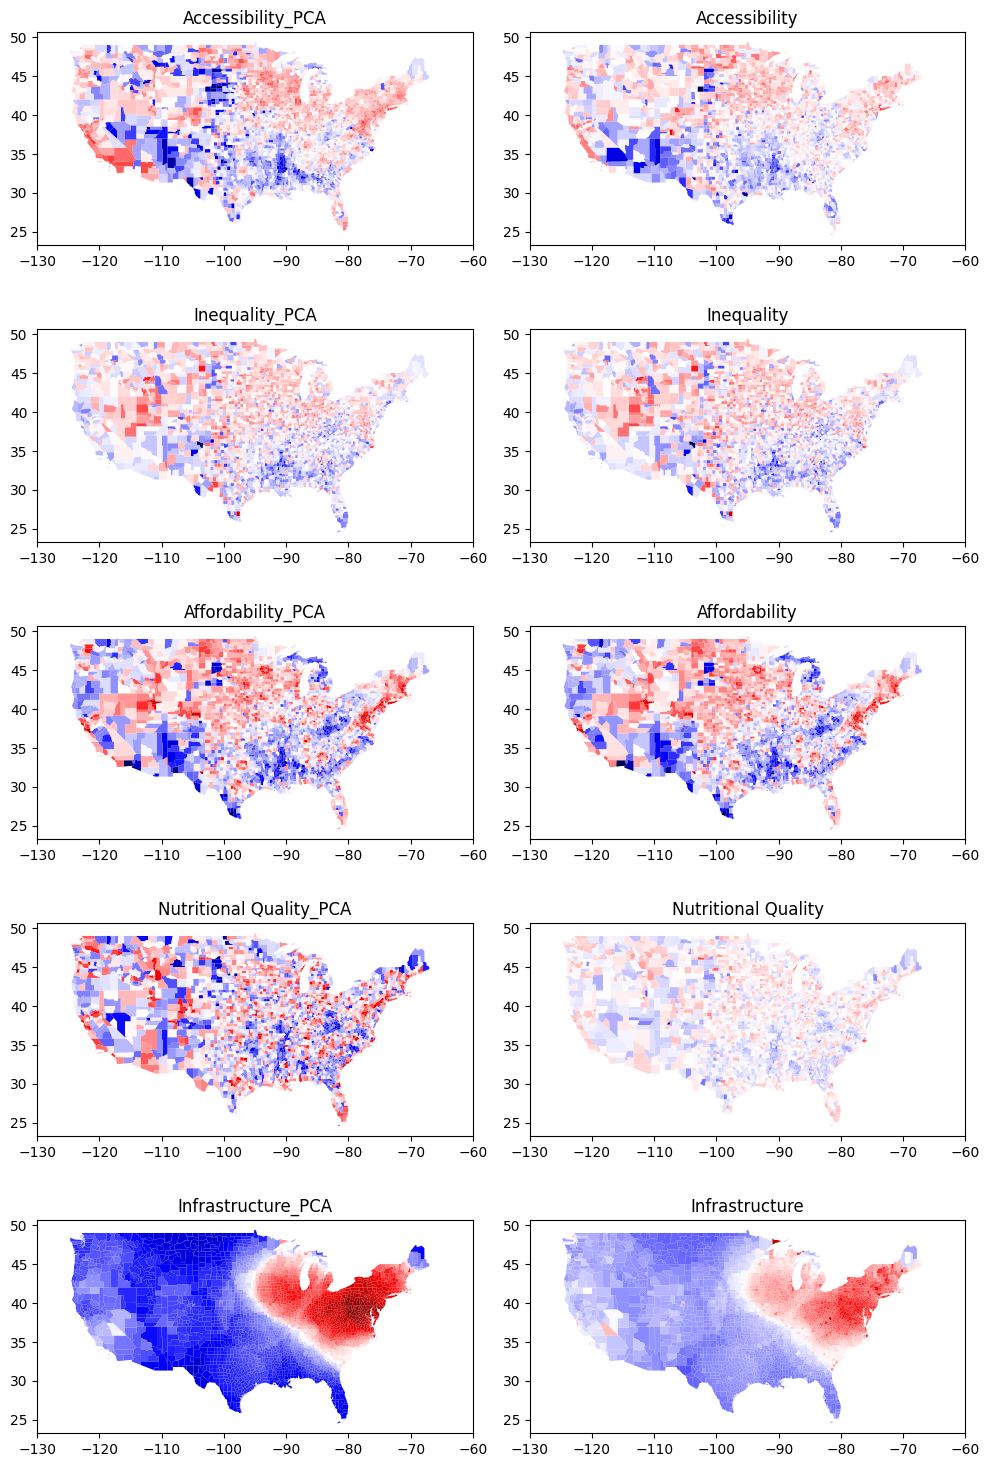

In [34]:
columns = ["Accessibility_PCA", "Inequality_PCA", "Affordability_PCA",
          "Nutritional Quality_PCA", "Infrastructure_PCA"]

fig, axs = plt.subplots(len(columns), 2, figsize=(10, 15))

for i, column in enumerate(columns):
    data = gdf[["geometry", column]]
    #data.plot(color="k", alpha=0.3 ,ax=axs[i][0])
    max_ = max(abs(min(data[column])), abs(max(data[column])))
    data.plot(column=column, ax=axs[i][0], cmap="seismic", vmin = -max_, vmax = max_)
    axs[i][0].set_title(column)
    x_min = -130
    x_max = -60
    axs[i][0].set_xlim(x_min, x_max)
    
columns = ["Accessibility", "Inequality", "Affordability",
          "Nutritional Quality", "Infrastructure"]
    
for i, column in enumerate(columns):
    data = gdf[["geometry", column]]
    #data.plot(color="k", alpha=0.3 ,ax=axs[i][1])
    max_ = max(abs(min(data[column])), abs(max(data[column])))
    data.plot(column=column, ax=axs[i][1], cmap="seismic", vmin = -max_, vmax = max_)
    axs[i][1].set_title(column)
    x_min = -130
    x_max = -60
    axs[i][1].set_xlim(x_min, x_max)

plt.tight_layout()
plt.show()

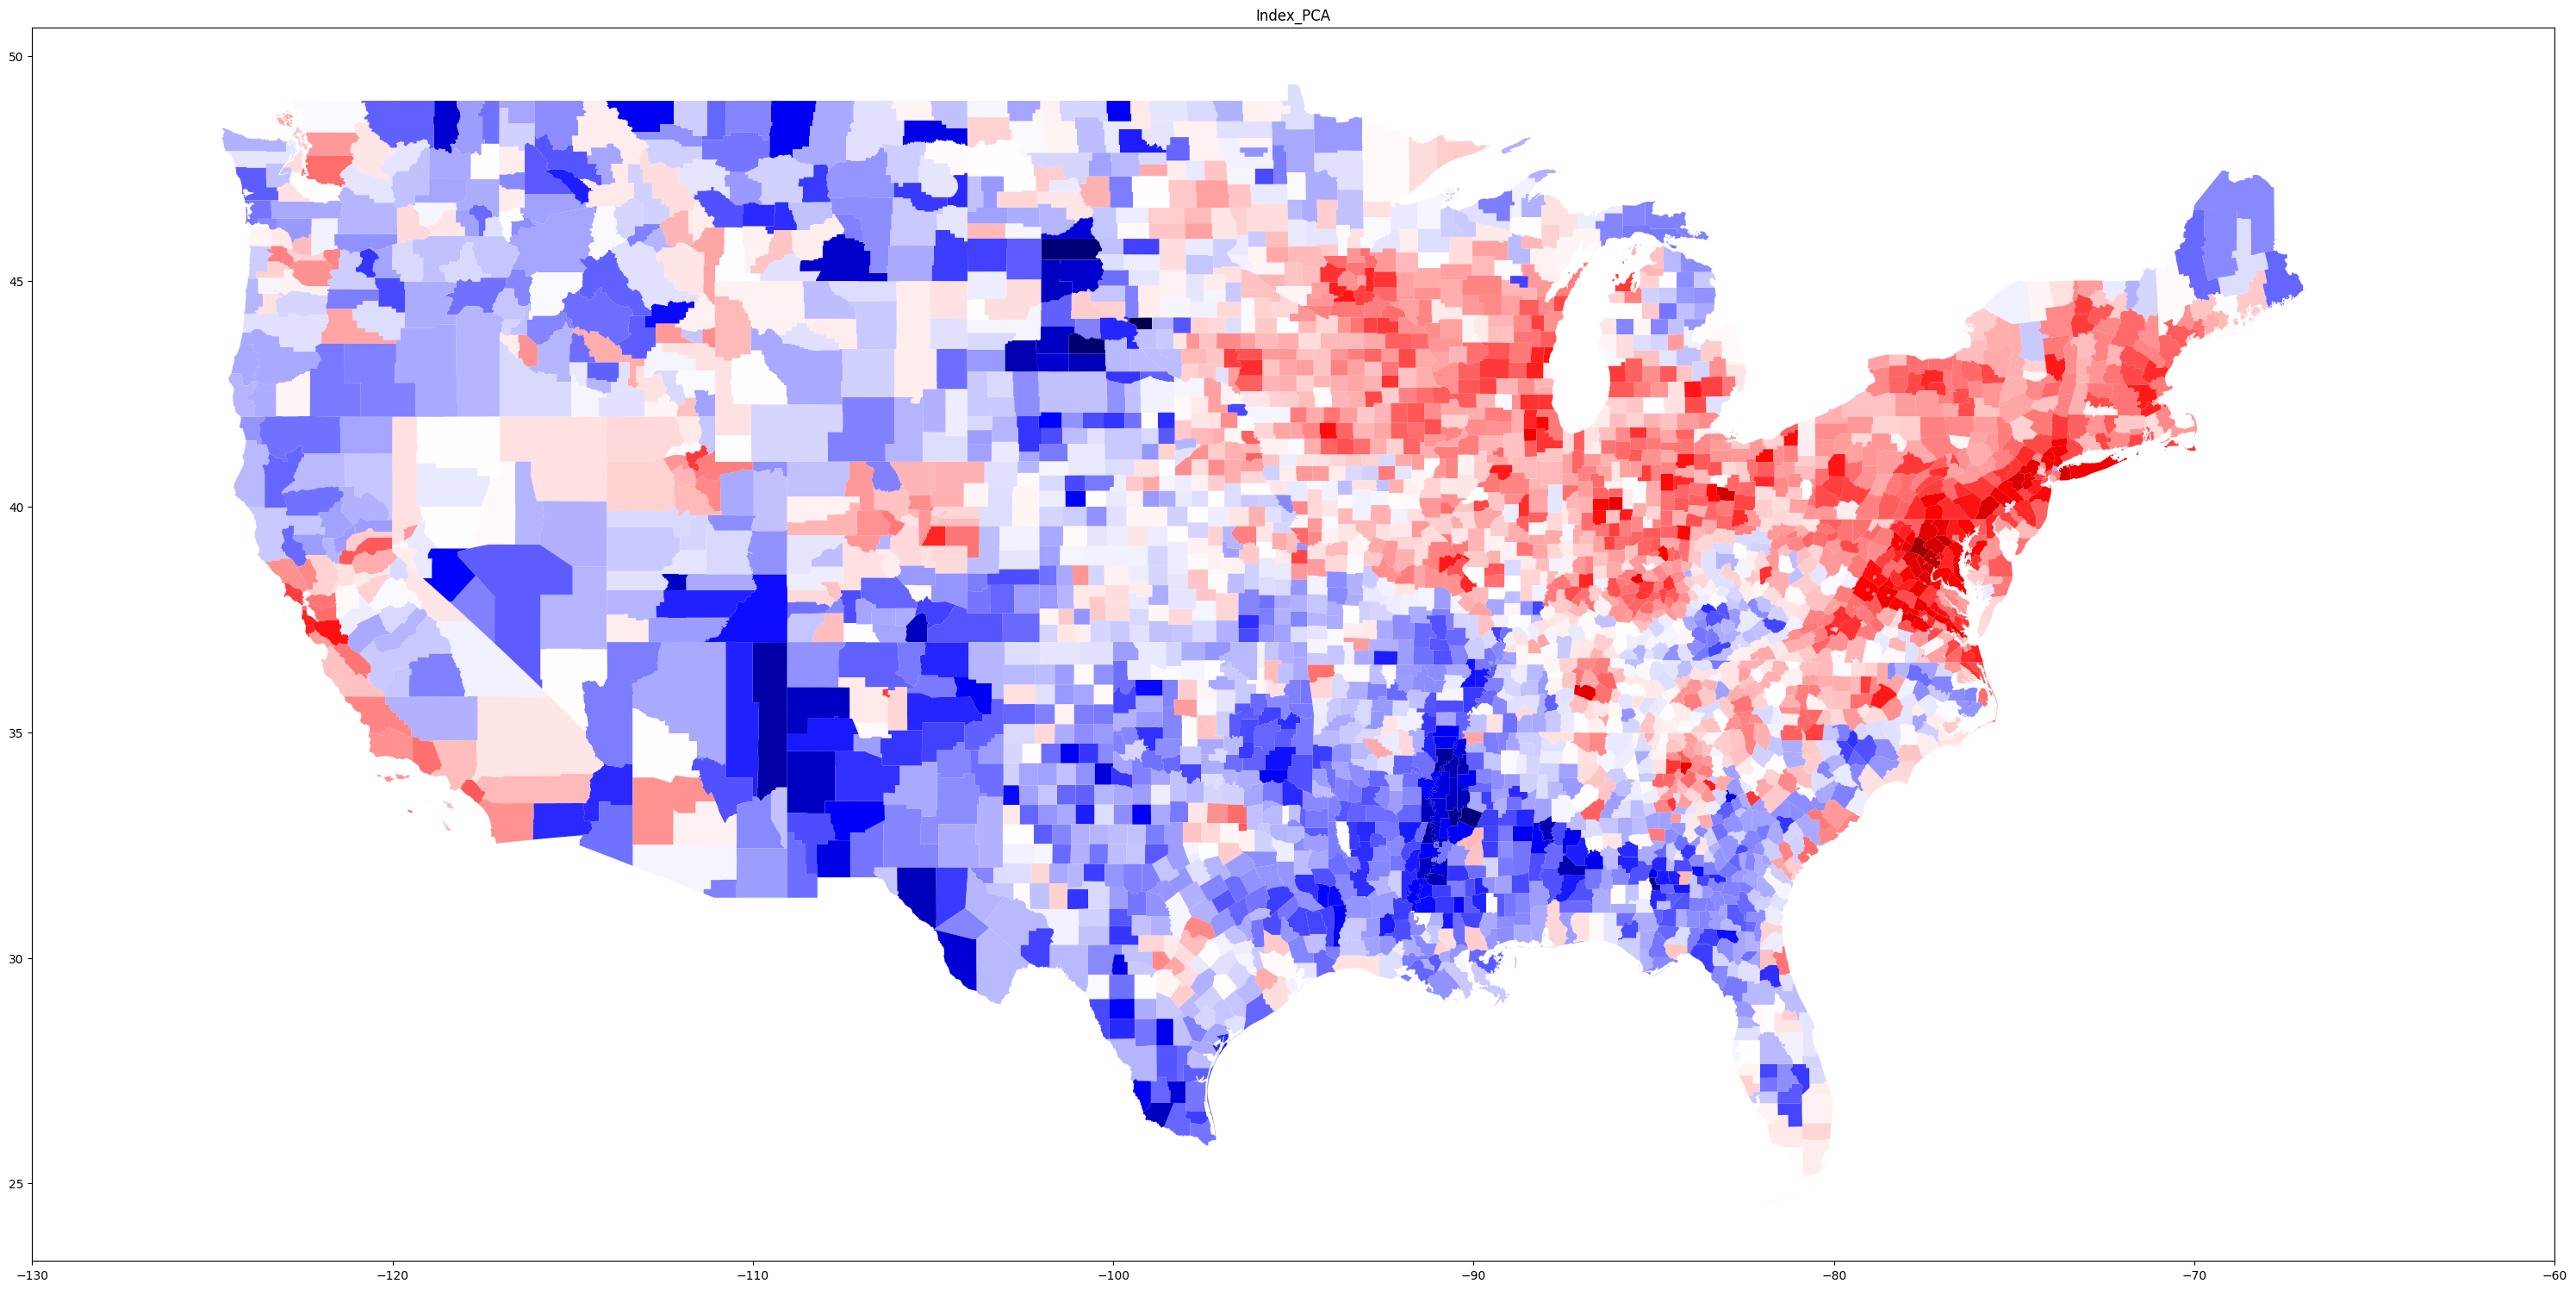

In [35]:
columns = ["Index_PCA"] #, "Index_mean", "Index PCA of means", "Index mean of PCAs"]

fig, axs = plt.subplots(len(columns), 1, figsize=(30, 45))
for i, column in enumerate(columns):
    data = gdf[["geometry", column]]
    #data.plot(color="k", alpha=0.3 ,ax=axs[i][1])
    max_ = max(abs(min(data[column])), abs(max(data[column])))
    data.plot(column=column, ax=axs, cmap="seismic", vmin = -max_, vmax = max_)
    axs.set_title(column)
    x_min = -130
    x_max = -60
    axs.set_xlim(x_min, x_max)

plt.tight_layout()
plt.show()

In [36]:
#This is that one small county with really large values
imputed_df.loc["08111"]

variable_name
below_poverty_level_percent_civilian_labor_force_16_years_and_over                                            -0.161069
convspth                                                                                                      -2.818441
d2c_intermediated_p                                                                                           -0.482081
ffrpth                                                                                                       -17.065177
fmrktpth                                                                                                      -0.590398
food_banks                                                                                                    -0.307245
food_desert_1and10                                                                                             0.291798
food_insecurity_rate                                                                                           0.724539
health_factors            

In [37]:
states = list(set(imputed_df["State"]))
states_df = pd.DataFrame(index = states)

imputed_df["Weighted Index"] = imputed_df["Population"] * imputed_df["Index_PCA"]

for state in states:
    states_df.loc[state, "Total Pop"] = sum(imputed_df[imputed_df["State"] == state]["Population"])
    states_df.loc[state, "Weighted Avg"] = sum(imputed_df[imputed_df["State"] == state]["Weighted Index"]) / states_df.loc[state, "Total Pop"]   
    
states_df

,Total Pop,Weighted Avg
Wyoming,578759.0,-0.512068
Michigan,9986857.0,1.235143
District of Columbia,705749.0,4.353173
Illinois,12671821.0,2.331582
Florida,21477737.0,-0.085930
Vermont,623989.0,2.193673
South Dakota,884659.0,0.363698
North Carolina,10488084.0,1.396422
Texas,28995881.0,-0.112726
Oregon,4217737.0,0.516237


In [38]:
indexes = ["AL Black Belt", "AL Other", "MS Delta", "MS Other", "Central App"]
regions_df = pd.DataFrame(index = indexes, columns = states_df.columns)

al_df = imputed_df[imputed_df["State"] == "Alabama"]
ms_df = imputed_df[imputed_df["State"] == "Mississippi"]

regions_df.loc["AL Black Belt", "Total Pop"] = sum(al_df[al_df["Region"] == "Black Belt"]["Population"])
regions_df.loc["AL Other", "Total Pop"] = sum(al_df[al_df["Region"] == "Other"]["Population"])
regions_df.loc["MS Delta", "Total Pop"] = sum(ms_df[ms_df["Region"] == "Mississippi Delta"]["Population"])
regions_df.loc["MS Other", "Total Pop"] = sum(ms_df[ms_df["Region"] == "Other"]["Population"])
regions_df.loc["Central App", "Total Pop"] = sum(imputed_df[imputed_df["Region"] == "Central Appalachia"]["Population"])

regions_df.loc["AL Black Belt", "Weighted Avg"] = sum(al_df[al_df["Region"] == "Black Belt"]["Weighted Index"]) / regions_df.loc["AL Black Belt", "Total Pop"]
regions_df.loc["AL Other", "Weighted Avg"] = sum(al_df[al_df["Region"] == "Other"]["Weighted Index"]) / regions_df.loc["AL Other", "Total Pop"]
regions_df.loc["MS Delta", "Weighted Avg"] = sum(ms_df[ms_df["Region"] == "Mississippi Delta"]["Weighted Index"]) / regions_df.loc["MS Delta", "Total Pop"]
regions_df.loc["MS Other", "Weighted Avg"] = sum(ms_df[ms_df["Region"] == "Other"]["Weighted Index"]) / regions_df.loc["MS Other", "Total Pop"]
regions_df.loc["Central App", "Weighted Avg"] = sum(imputed_df[imputed_df["Region"] == "Central Appalachia"]["Weighted Index"]) / regions_df.loc["Central App", "Total Pop"]

regions_df

,Total Pop,Weighted Avg
AL Black Belt,556425.0,-2.279652
AL Other,4346760.0,0.017532
MS Delta,564143.0,-2.516144
MS Other,2412006.0,-1.67589
Central App,1851409.0,-0.380439


In [39]:
states_df.to_excel("State Avgs.xlsx")

In [40]:
imputed_df.to_excel("zscores_contains_imputed.xlsx")

In [41]:
imputed_df[~imputed_df["Region"].isin(["Other"])].to_excel("Filtered Regions.xlsx")